#### Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action="ignore")

#### Loading dataset and Looking into Correlations

In [2]:
class Correlation:

    def __init__(self, path):  
        self.path = path 
         
    # load dataset and create the ctr column
    def get_data(self):
        data = pd.read_csv(self.path)
        print('org shape:', data.shape)
        # ctr
        ''' click_through_rates = click-through-event/first_dropped'''
        data['ctr'] = data['click-through-event']/data['first_dropped']
        print('new shape:', data.shape)
        # print(data.info)
        return data

    # get features most correlated with ctr
    def correlation_map(self, f_data, f_feature, f_number):
        f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
        f_correlation = f_data[f_most_correlated].corr()
        
        f_mask = np.zeros_like(f_correlation)
        f_mask[np.triu_indices_from(f_mask)] = True
        with sns.axes_style("white"):
            f_fig, f_ax = plt.subplots(figsize=(6, 4))
            f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                            annot=True, annot_kws={"size": 10}, cmap="BuPu")

        plt.show()

    # correlation with the 3 categorical features: region, vertical and season
    '''Since we're not gonna do any modeling, we just use label encoding'''
    def specialised_corr(self, data, feature1, feature2, feature3, target):
        global df
        df = data[[feature1, feature2, feature3, target]]
        encoder = LabelEncoder()
        for col in [feature1, feature2, feature3]:
            df[col] = encoder.fit_transform(df[col])

        # encoded_df = pd.DataFrame(encoded_df, columns = df.columns)
        corr = df.corr()
        print(corr)
        plt.figure(figsize = (6,4))
        sns.heatmap(corr, cmap = 'BuPu')
        plt.show()

In [3]:
ctr = Correlation('/content/dataset.csv')
data = ctr.get_data()
data.head()

org shape: (3272, 8)
new shape: (3272, 9)


,first_key,version,region,season,vertical,click-through-event,first_dropped,impression,ctr
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0.0,1.0,1.0,0.000000
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568.0,23607.0,54873.0,0.066421
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0.0,6.0,26.0,0.000000
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0.0,0.0,6.0,NaN
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0.0,31.0,85.0,0.000000


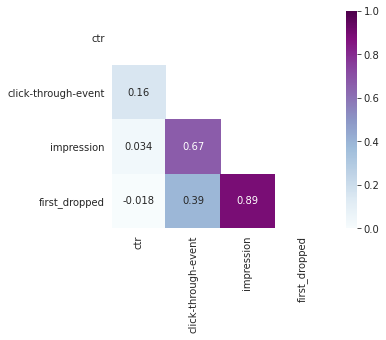

In [8]:
# only 3 numerical features other than ctr. (kinda makes the last function useless)
ctr.correlation_map(data, 'ctr', 4)

The correlations are really low. the highest being .16 with **click-through_event**.

            region  vertical    season       ctr
region    1.000000 -0.201783  0.164563 -0.073683
vertical -0.201783  1.000000 -0.039236  0.049980
season    0.164563 -0.039236  1.000000  0.033611
ctr      -0.073683  0.049980  0.033611  1.000000


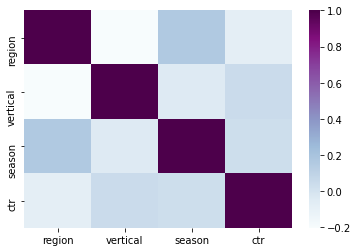

In [5]:
ctr.specialised_corr(data, 'region', 'vertical', 'season', 'ctr')

They all have low to no correlation with click-through-rates.
But since region has the highest -ve correlation, lets look into it.


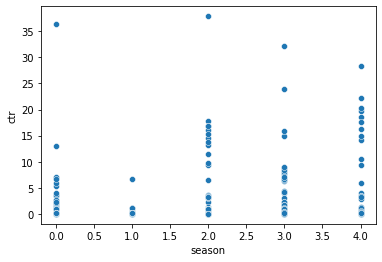

In [6]:
sns.scatterplot(y = df['ctr'], x = df['season'])

Not even visible on a plot.